# Asignment 7

## 1

### A

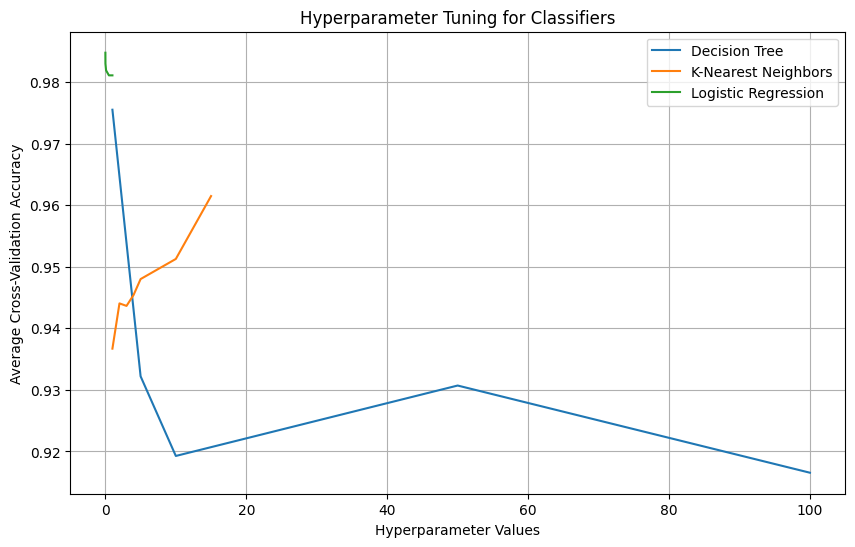

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

filepath = "../Data/train_office.csv"

# Load the data
data = pd.read_csv(filepath)

# Drop the 'date' column from features
X = data.drop(['Occupancy', 'date'], axis=1)
y = data['Occupancy']

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Define hyperparameter grids
param_grids = {
    'Decision Tree': {'max_depth': [1, 5, 10, 50, 100]},
    'K-Nearest Neighbors': {'n_neighbors': [1, 2, 3, 4, 5, 10, 15]},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 0.5, 1]}
}

# Perform 5-fold cross-validation and calculate average accuracy
avg_accuracies = {}

for clf_name, clf in classifiers.items():
    param_grid = param_grids[clf_name]
    scores = []
    
    for param_name, param_values in param_grid.items():
        for val in param_values:
            params = {param_name: val}
            param_scores = cross_val_score(clf.set_params(**params), X, y, cv=5)
            scores.append(np.mean(param_scores))
    
    avg_accuracies[clf_name] = scores

# Plotting
plt.figure(figsize=(10, 6))

for clf_name, scores in avg_accuracies.items():
    param_values = list(param_grids[clf_name].values())[0]
    plt.plot(param_values, scores, label=clf_name)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Average Cross-Validation Accuracy')
plt.legend()
plt.title('Hyperparameter Tuning for Classifiers')
plt.grid(True)
plt.show()

### B

For K-Nearest Neigbors, I chose 15,
For Decision Tree, I chose 1
For Logistic Regression, I chose .001

### C

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load the data
data = pd.read_csv("../Data/train_office.csv")

# Drop the 'date' column from features
X = data.drop(['Occupancy', 'date'], axis=1)
y = data['Occupancy']

# Train Decision Tree with chosen hyperparameter (max_depth=1)
dt_model = DecisionTreeClassifier(max_depth=1)
dt_model.fit(X, y)

# Train K-Nearest Neighbors with chosen hyperparameter (n_neighbors=15)
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X, y)

# Train Logistic Regression with chosen hyperparameter (C=0.001)
lr_model = LogisticRegression(C=0.001)
lr_model.fit(X, y)

LogisticRegression(C=0.001)

### D

Confusion Matrix for Decision Tree (DT):
 [[641   6]
 [  1 149]]

Confusion Matrix for K-Nearest Neighbors (KNN):
 [[641   6]
 [  1 149]]

Confusion Matrix for Logistic Regression (LR):
 [[641   6]
 [  0 150]]


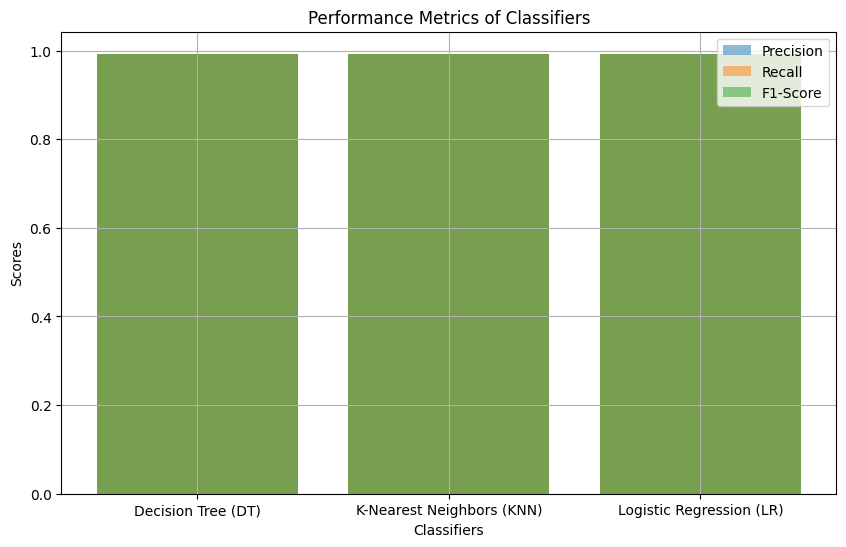

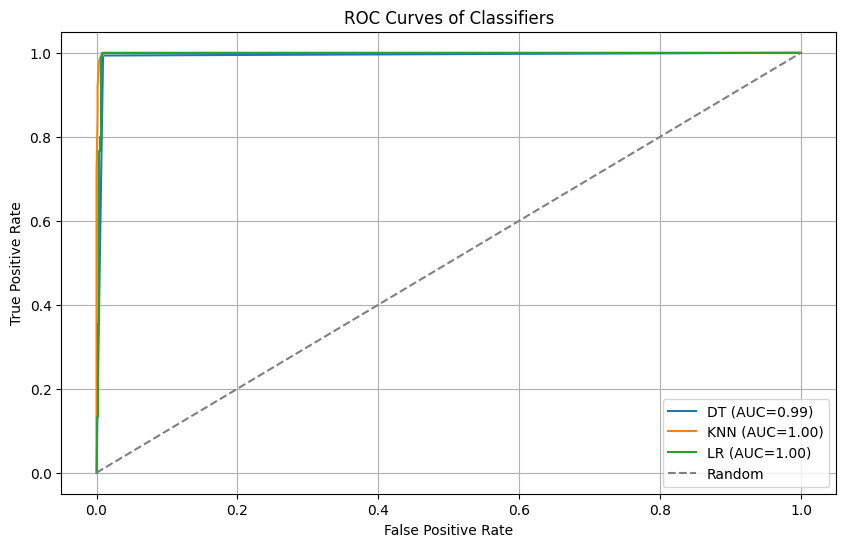

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the test data
test_data = pd.read_csv("../Data/test_office.csv")
X_test = test_data.drop(['Occupancy', 'date'], axis=1)
y_test = test_data['Occupancy']

# Use the trained models to predict labels for test samples
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# i. Print out the confusion matrices
confusion_dt = confusion_matrix(y_test, y_pred_dt)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
confusion_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix for Decision Tree (DT):\n", confusion_dt)
print("\nConfusion Matrix for K-Nearest Neighbors (KNN):\n", confusion_knn)
print("\nConfusion Matrix for Logistic Regression (LR):\n", confusion_lr)

# ii. Calculate precision, recall, and F1-score and draw a bar plot
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

precisions = [report_dt['weighted avg']['precision'], report_knn['weighted avg']['precision'], report_lr['weighted avg']['precision']]
recalls = [report_dt['weighted avg']['recall'], report_knn['weighted avg']['recall'], report_lr['weighted avg']['recall']]
f1_scores = [report_dt['weighted avg']['f1-score'], report_knn['weighted avg']['f1-score'], report_lr['weighted avg']['f1-score']]

classifiers = ['Decision Tree (DT)', 'K-Nearest Neighbors (KNN)', 'Logistic Regression (LR)']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, precisions, alpha=0.5, label='Precision')
plt.bar(classifiers, recalls, alpha=0.5, label='Recall')
plt.bar(classifiers, f1_scores, alpha=0.5, label='F1-Score')
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Performance Metrics of Classifiers')
plt.legend()
plt.grid(True)
plt.show()

# iii. Draw ROC curves and calculate AUCs
prob_dt = dt_model.predict_proba(X_test)[:, 1]
prob_knn = knn_model.predict_proba(X_test)[:, 1]
prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, prob_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)

auc_dt = roc_auc_score(y_test, prob_dt)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_lr = roc_auc_score(y_test, prob_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC={auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classifiers')
plt.legend()
plt.grid(True)
plt.show()

### e

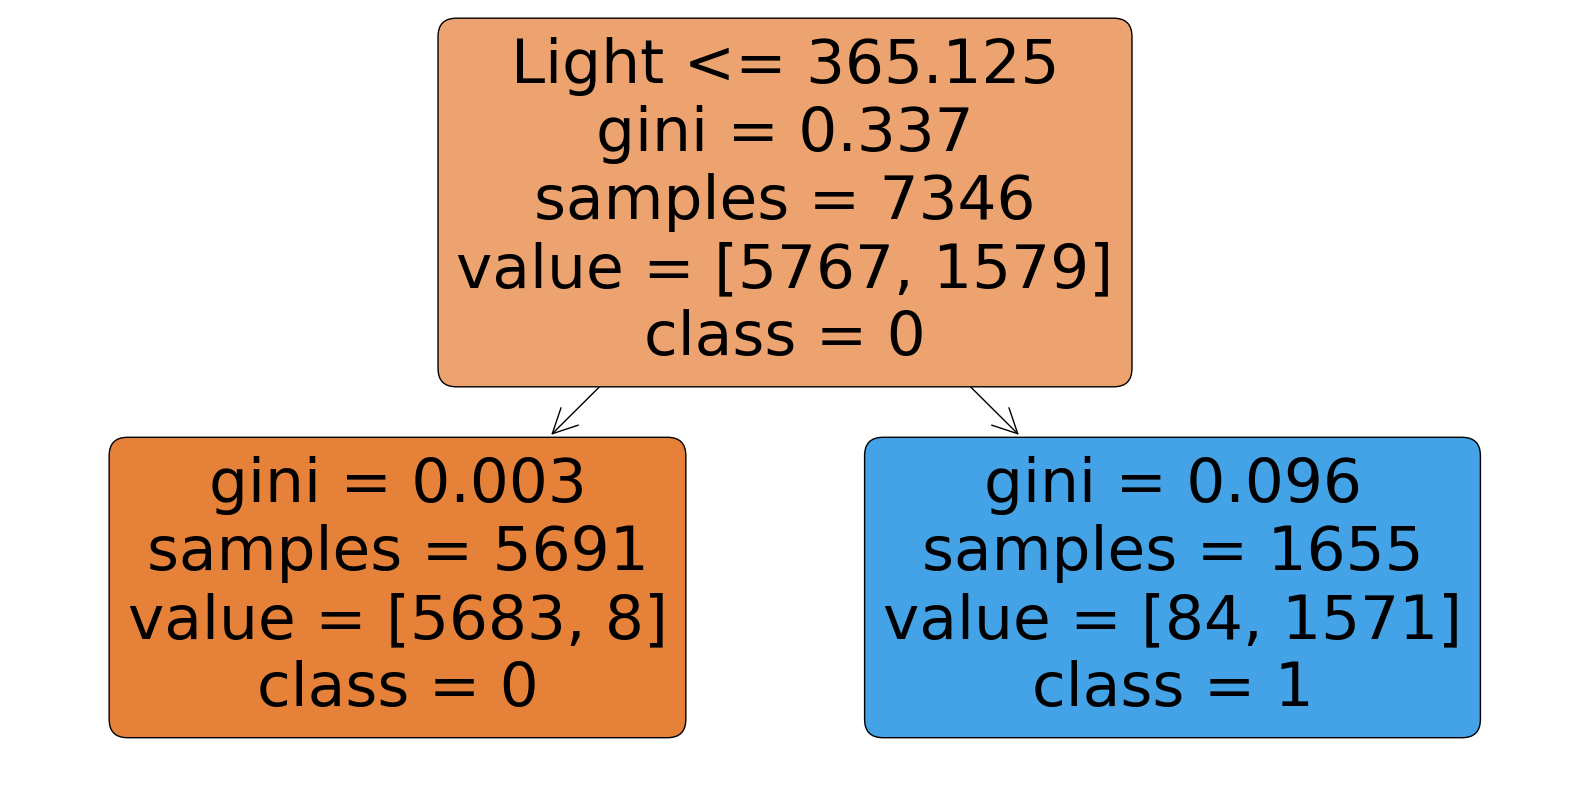

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))

# Use the plot_tree function to visualize the decision tree
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)

# Show the plot
plt.show()

## 2

### A

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
datapath = '../Data/msft.csv'
data = pd.read_csv(datapath)

# Convert 'Date' column to numeric representation
data['Date'] = pd.to_datetime(data['Date']).astype(int)

# Separate features (X) and target variable (y)
X = data.drop('Adj Close', axis=1)
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'criterion': ['mse', 'friedman_mse'],  # Valid criteria for DecisionTreeRegressor
    'splitter': ['best', 'random'],  # Split strategy
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Score: 0.9996030390707705


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

### B

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the decision tree regressor with best hyperparameters
best_regressor = DecisionTreeRegressor(**best_params)

# Train the decision tree regressor on the entire training set
best_regressor.fit(X_train, y_train)

# Predict labels for test set
y_pred = best_regressor.predict(X_test)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE) on test set:", rmse)


Root Mean Squared Error (RMSE) on test set: 0.18579121827926748


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### C

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

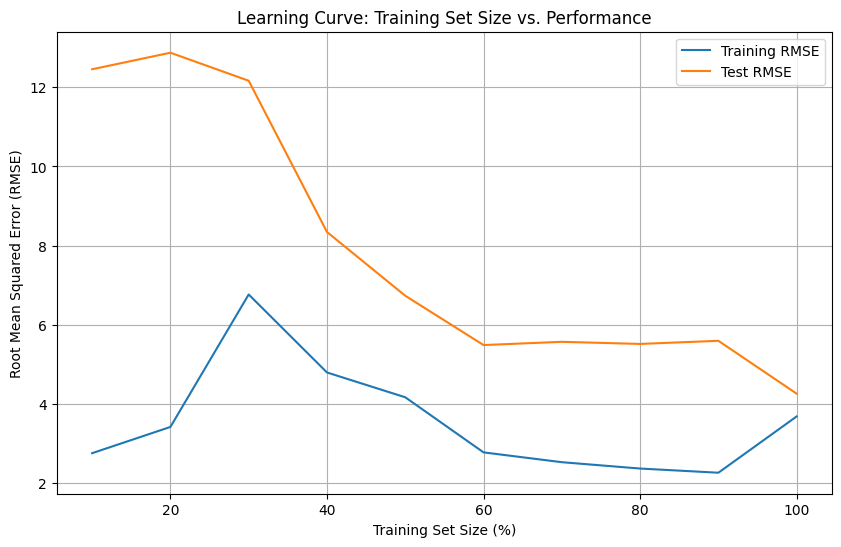

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define percentages for training set size (k% increments)
percentages = np.arange(10, 101, 10) / 100.0

# Initialize lists to store performance metrics
train_rmse = []
test_rmse = []

# Get the total number of samples in the dataset
total_samples = len(X)

# Iterate over each percentage
for percent in percentages:
    # Calculate the fraction of samples for this percentage
    train_fraction = percent / 100.0
    
    # Split the data into training and test sets based on the calculated train_fraction
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_fraction, random_state=42)

    # Initialize and train the decision tree regressor
    dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='best')
    dt_regressor.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = dt_regressor.predict(X_train)
    y_test_pred = dt_regressor.predict(X_test)

    # Calculate RMSE for training and test sets
    train_rmse.append(mean_squared_error(y_train, y_train_pred, squared=False))
    test_rmse.append(mean_squared_error(y_test, y_test_pred, squared=False))

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(percentages * 100, train_rmse, label='Training RMSE')
plt.plot(percentages * 100, test_rmse, label='Test RMSE')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curve: Training Set Size vs. Performance')
plt.legend()
plt.grid(True)
plt.show()

### C Cont.

The more we input, the less errors we get.

### D

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

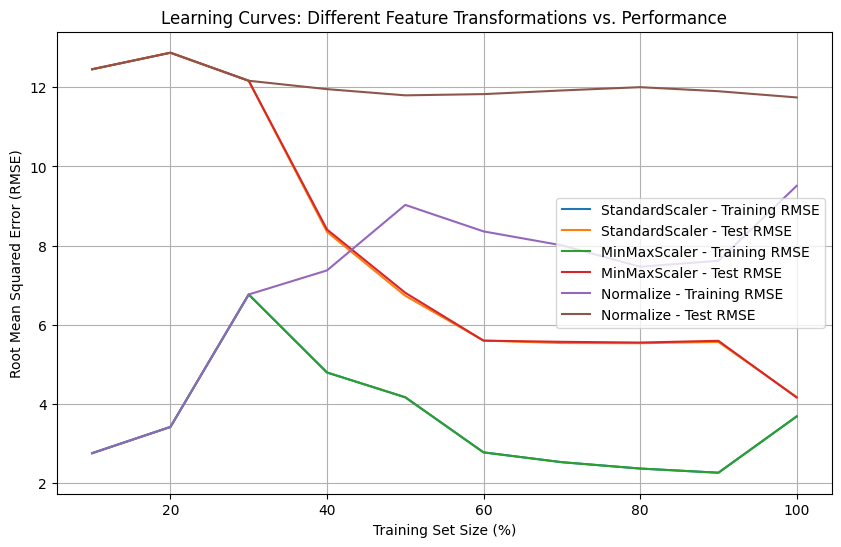

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
datapath = '../Data/msft.csv'
data = pd.read_csv(datapath)

# Convert 'Date' column to numeric representation
data['Date'] = pd.to_datetime(data['Date']).astype(int)

# Separate features (X) and target variable (y)
X = data.drop('Adj Close', axis=1)
y = data['Adj Close']

# Define percentages for training set size (k% increments)
percentages = np.arange(10, 101, 10) / 100.0

# Initialize lists to store performance metrics for each transformation
train_rmse_standard, test_rmse_standard = [], []
train_rmse_minmax, test_rmse_minmax = [], []
train_rmse_normalized, test_rmse_normalized = [], []

# Apply StandardScaler transformation to input features
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)

# Apply MinMaxScaler transformation to input features
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)

# Apply normalize transformation to input features
X_normalized = normalize(X)

# Iterate over each percentage
for percent in percentages:
    # Split the StandardScaler transformed data into training and test sets
    X_train_standard, X_test_standard, y_train, y_test = train_test_split(X_scaled_standard, y, train_size=percent / 100, random_state=42)

    # Initialize and train the decision tree regressor with StandardScaler transformed data
    dt_regressor_standard = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='best')
    dt_regressor_standard.fit(X_train_standard, y_train)

    # Predict on training and test sets using StandardScaler transformed data
    y_train_pred_standard = dt_regressor_standard.predict(X_train_standard)
    y_test_pred_standard = dt_regressor_standard.predict(X_test_standard)

    # Calculate RMSE for training and test sets using StandardScaler transformed data
    train_rmse_standard.append(mean_squared_error(y_train, y_train_pred_standard, squared=False))
    test_rmse_standard.append(mean_squared_error(y_test, y_test_pred_standard, squared=False))

    # Repeat the same steps for MinMaxScaler transformed data
    X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X_scaled_minmax, y, train_size=percent / 100, random_state=42)
    dt_regressor_minmax = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='best')
    dt_regressor_minmax.fit(X_train_minmax, y_train)
    y_train_pred_minmax = dt_regressor_minmax.predict(X_train_minmax)
    y_test_pred_minmax = dt_regressor_minmax.predict(X_test_minmax)
    train_rmse_minmax.append(mean_squared_error(y_train, y_train_pred_minmax, squared=False))
    test_rmse_minmax.append(mean_squared_error(y_test, y_test_pred_minmax, squared=False))

    # Repeat the same steps for normalized data
    X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, train_size=percent / 100, random_state=42)
    dt_regressor_normalized = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2, splitter='best')
    dt_regressor_normalized.fit(X_train_normalized, y_train)
    y_train_pred_normalized = dt_regressor_normalized.predict(X_train_normalized)
    y_test_pred_normalized = dt_regressor_normalized.predict(X_test_normalized)
    train_rmse_normalized.append(mean_squared_error(y_train, y_train_pred_normalized, squared=False))
    test_rmse_normalized.append(mean_squared_error(y_test, y_test_pred_normalized, squared=False))

# Plotting the learning curves for each transformation
plt.figure(figsize=(10, 6))
plt.plot(percentages * 100, train_rmse_standard, label='StandardScaler - Training RMSE')
plt.plot(percentages * 100, test_rmse_standard, label='StandardScaler - Test RMSE')
plt.plot(percentages * 100, train_rmse_minmax, label='MinMaxScaler - Training RMSE')
plt.plot(percentages * 100, test_rmse_minmax, label='MinMaxScaler - Test RMSE')
plt.plot(percentages * 100, train_rmse_normalized, label='Normalize - Training RMSE')
plt.plot(percentages * 100, test_rmse_normalized, label='Normalize - Test RMSE')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Learning Curves: Different Feature Transformations vs. Performance')
plt.legend()
plt.grid(True)
plt.show()

### D cont.

Normalizing was the processing tecnique that helped the most

## 3

### A

In [69]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
datapath = '../Data/traffic.csv'
data = pd.read_csv(datapath)

        date  0:00  0:05  0:10  0:15  0:20  0:25  0:30  0:35  0:40  ...  \
0  4/10/2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1  4/11/2005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2  4/12/2005   3.0   8.0  10.0   6.0   1.0   4.0   9.0   4.0   6.0  ...   
3  4/13/2005   6.0   5.0   4.0   4.0   4.0   4.0   4.0   2.0  12.0  ...   
4  4/14/2005   7.0   3.0   6.0  11.0   8.0   6.0   6.0  10.0   4.0  ...   

   23:15  23:20  23:25  23:30  23:35  23:40  23:45  23:50  23:55      class  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN       none  
1   12.0    6.0    8.0   11.0    7.0    2.0    3.0    6.0    8.0       none  
2    4.0   10.0    2.0    6.0    5.0    4.0    5.0    6.0    7.0  afternoon  
3    7.0   15.0   10.0    4.0   10.0    6.0   10.0    6.0   16.0    evening  
4    5.0    9.0    4.0    4.0    6.0    9.0    5.0   16.0    8.0       none  

[5 rows x 290 columns]


### B

In [70]:
# Remove the 'date' column from the DataFrame
data = data.drop(columns=['date'])

# Extract the 'class' column as a Series object named 'Y'
Y = data['class']

# Remove the 'class' column from the DataFrame
data = data.drop(columns=['class'])

# Replace class strings with numerical values
class_mapping = {'none': 0, 'afternoon': 1, 'night': 2}
Y = Y.map(class_mapping)

# Display the modified DataFrame and the Series 'Y' to check the results
print("Modified DataFrame:")
print(data.head())

print("\nSeries Y (class mapping):")
print(Y.head())

Modified DataFrame:
   0:00  0:05  0:10  0:15  0:20  0:25  0:30  0:35  0:40  0:45  ...  23:10  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   12.0   
2   3.0   8.0  10.0   6.0   1.0   4.0   9.0   4.0   6.0  13.0  ...   10.0   
3   6.0   5.0   4.0   4.0   4.0   4.0   4.0   2.0  12.0   2.0  ...    7.0   
4   7.0   3.0   6.0  11.0   8.0   6.0   6.0  10.0   4.0   7.0  ...   12.0   

   23:15  23:20  23:25  23:30  23:35  23:40  23:45  23:50  23:55  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1   12.0    6.0    8.0   11.0    7.0    2.0    3.0    6.0    8.0  
2    4.0   10.0    2.0    6.0    5.0    4.0    5.0    6.0    7.0  
3    7.0   15.0   10.0    4.0   10.0    6.0   10.0    6.0   16.0  
4    5.0    9.0    4.0    4.0    6.0    9.0    5.0   16.0    8.0  

[5 rows x 288 columns]

Series Y (class mapping):
0    0.0
1    0.0
2    1.0
3    NaN
4    0.0
Name: class, dtype:

### C

In [71]:
from sklearn.cluster import KMeans

# Instantiate the KMeans clustering algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model to the data (excluding NaN values)
kmeans.fit(data.dropna())

# Get the cluster labels for each sample
cluster_labels = kmeans.labels_

# Display the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[1 1 1 2 1 1 1 2 2 1 1 1 1 1 0 2 1 1 1 1 1 2 2 1 1 1 1 0 0 2 1 1 1 1 0 2 2
 1 1 2 2 2 1 0 1 0 0 2 1 1 1 1 0 0 2 1 1 1 1 1 2 2 1 1 1 1 2 2 0 2 2 1 1 1
 2 2 1 0 2 2 1 1 1 0 2 1 1 1 1 0 0 2 1 1 1 1 2 2 1 1 1 1 1 0 2 1 1 1 1 1 2
 2 1 1 1 1 0 0 2 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 0 2 1 1 1 1 1]


### D

In [78]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score, \
    homogeneity_score, completeness_score, v_measure_score, silhouette_score, davies_bouldin_score


# Filter samples with corresponding cluster labels and no NaN in Y_valid
valid_indices = [i for i in range(len(cluster_labels)) if not np.isnan(cluster_labels[i]) and not np.isnan(Y[i])]
Y_valid = Y[valid_indices]
cluster_labels_valid = cluster_labels[valid_indices]

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_valid, cluster_labels_valid)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the evaluation metrics
ari = adjusted_rand_score(Y_valid, cluster_labels_valid)
print("Adjusted Rand Index:", ari)

ami = adjusted_mutual_info_score(Y_valid, cluster_labels_valid)
print("Adjusted Mutual Information:", ami)

homo = homogeneity_score(Y_valid, cluster_labels_valid)
print("Homogeneity Score:", homo)

completeness = completeness_score(Y_valid, cluster_labels_valid)
print("Completeness Score:", completeness)

v_measure = v_measure_score(Y_valid, cluster_labels_valid)
print("V-measure Score:", v_measure)

# Reshape Series to DataFrame for silhouette score and Davies-Bouldin index calculation
Y_valid_df = pd.DataFrame(Y_valid)
cluster_labels_valid_df = pd.DataFrame(cluster_labels_valid)

# Calculate silhouette score and Davies-Bouldin index
silhouette = silhouette_score(Y_valid_df, cluster_labels_valid_df)
print("Silhouette Score:", silhouette)

davies_bouldin = davies_bouldin_score(X.iloc[valid_indices], cluster_labels_valid)
print("Davies-Bouldin Index:", davies_bouldin)

Confusion Matrix:
[[13 50 16]
 [ 1 10  8]
 [ 0  0  0]]
Adjusted Rand Index: 0.027480290219207743
Adjusted Mutual Information: 0.017698635881410345
Homogeneity Score: 0.047381817261358726
Completeness Score: 0.025248405624004915
V-measure Score: 0.03294263170045546
Silhouette Score: -0.36518147631723497
Davies-Bouldin Index: 17.4435664440489


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
